<a href="https://colab.research.google.com/github/jasmine-yolo/Python-practice/blob/main/P_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **linear regression**









In [40]:
import os
import numpy as np
import pandas as pd
import tqdm
import matplotlib.pyplot as plt
from sklearn.linear_model import *
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error

In [2]:
from google.colab import drive

# mount the Google drive as a path that you can work on 
drive.mount('/drive')

df_0 = pd.read_csv('/drive/My Drive/Colab Notebooks/Data/smalldata.csv', parse_dates=['DATE'])

Mounted at /drive


In [57]:
df_0.info(verbose=True,show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77836 entries, 0 to 77835
Data columns (total 102 columns):
 #    Column           Non-Null Count  Dtype         
---   ------           --------------  -----         
 0    Unnamed: 0       77836 non-null  float64       
 1    DATE             77836 non-null  datetime64[ns]
 2    permno           77836 non-null  float64       
 3    RET              77836 non-null  float64       
 4    mvel1            77836 non-null  float64       
 5    prc              77836 non-null  float64       
 6    SHROUT           77836 non-null  float64       
 7    beta             77836 non-null  float64       
 8    betasq           77836 non-null  float64       
 9    chmom            77836 non-null  float64       
 10   dolvol           77836 non-null  float64       
 11   idiovol          77836 non-null  float64       
 12   indmom           77836 non-null  float64       
 13   mom1m            77836 non-null  float64       
 14   mom6m            778

In [66]:
df=df_0.dropna(axis=0, how='any')

df.drop(columns=['Unnamed: 0'], inplace=True)

In [67]:
#set DATE as index
df.set_index('DATE', inplace=True)
df.sort_values('DATE', inplace=True)

In [68]:
df['lead(RET,1)'] = df['RET'].shift(-1)
df.drop(columns=['RET'],inplace=True)
df.dropna(axis=0, how='any')

,permno,mvel1,prc,SHROUT,beta,betasq,chmom,dolvol,idiovol,indmom,...,ill,maxret,retvol,std_dolvol,std_turn,zerotrade,sic2,bm,bm_ia,"lead(RET,1)"
DATE,,,,,,,,,,,,,,,,,,,,,
2010-01-29,86098.0,45513.7500,0.6699,60685.0,0.5189,0.2692,-1.8095,9.3795,0.1002,0.6411,...,6.4700e-07,0.0789,0.0309,0.8049,0.5787,1.0600e-07,73.0,1.0539,0.1835,-0.0696
2010-01-29,90605.0,289238.0061,16.8400,15980.0,1.0500,1.1025,-0.0257,11.2450,0.0797,0.0841,...,3.8500e-08,0.0899,0.0261,1.1221,2.4186,4.1400e-08,42.0,0.7493,-0.3943,-0.0075
2010-01-29,63706.0,283082.7930,30.5700,9191.0,0.9752,0.9509,-0.6351,11.2540,0.0463,0.3997,...,2.7900e-08,0.0109,0.0119,0.5471,0.7024,8.2600e-08,67.0,0.0003,-1.5171,0.0000
2010-01-29,38746.0,82145.1989,13.7000,5996.0,1.3773,1.8970,0.8894,9.4867,0.0783,0.6636,...,4.6000e-07,0.0415,0.0157,1.0795,0.7888,9.3700e-08,65.0,0.5191,-1.5351,0.0142
2010-01-29,89898.0,83790.6580,1.4300,63428.0,0.8979,0.8063,0.3844,10.9682,0.1213,0.1358,...,7.7000e-08,0.0966,0.0300,0.5177,2.0774,2.5100e-08,44.0,0.1074,-1.1079,-0.0436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31,20123.0,294300.0126,10.3600,30000.0,1.0233,1.0505,-0.0134,13.1705,0.0431,-0.0195,...,8.3500e-09,0.0143,0.0077,1.6162,2.2928,1.5500e-07,55.0,0.5873,-0.1299,0.1974
2020-12-31,79150.0,537326.9892,45.2600,14215.0,1.1219,1.2586,0.5472,13.4081,0.0673,0.3322,...,8.2500e-09,0.0920,0.0407,0.4779,2.8344,1.6400e-08,28.0,0.5873,-0.1299,-0.0541
2020-12-31,17444.0,30115.7999,13.2800,2145.0,1.8580,3.4522,0.5637,8.8356,0.0818,0.3176,...,1.1500e-05,0.0668,0.0318,1.5229,0.8889,9.9200e-08,36.0,0.5873,-0.1299,0.1030


In [69]:
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna()

In [70]:
X_train, X_test, y_train, y_test = train_test_split(
      df.drop(['lead(RET,1)'], axis=1),
      df.loc[:,['lead(RET,1)']],
      test_size=0.3, shuffle=False)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((54484, 99), (54484, 1), (23351, 99), (23351, 1))

In [71]:
model_lin = LinearRegression()

In [72]:
%time model_lin.fit(X_train, y_train)

CPU times: user 758 ms, sys: 51.4 ms, total: 810 ms
Wall time: 462 ms


LinearRegression()

In [76]:
### COMPUTE STOCHASTIC DROPOUT ###
%%time
#mse
msescores = []
for i in tqdm.tqdm(range(0,50)):
    msescores.append(mean_squared_error(y_test, model_lin.predict(X_test).ravel()))

#mae
maescores = []
for i in tqdm.tqdm(range(0,50)):
    maescores.append(mean_absolute_error(y_test, model_lin.predict(X_test).ravel()))

100%|██████████| 50/50 [00:00<00:00, 103.14it/s]

CPU times: user 1.16 s, sys: 667 ms, total: 1.82 s
Wall time: 1 s


In [75]:
print(np.mean(msescores), np.std(msescores),np.mean(maescores), np.std(maescores))

0.033583998177776214 6.938893903907228e-18 0.10290062634000736 1.3877787807814457e-17


# **interview questions**

**What is linear regression?**
  
In simple terms, linear regression is a method of finding the best straight line fitting to the given data, i.e. finding the best linear relationship between the independent and dependent variables.

In technical terms, linear regression is a machine learning algorithm that finds the best linear-fit relationship on any given data, between independent and dependent variables. It is mostly done by the Sum of Squared Residuals Method.

线性回归是一种机器学习方法，用于对被解释变量与一个或多个解释变量之间的关系进行建模。




**What are the assumptions of Linear regression?**
* linear relationship
解释变量与被解释变量之间需要成线性关系，可以用散点图检查
* No auto-correlation or independence 残差之间彼此独立，可以用Durbin-Watson (DW)检验，DW=2则彼此独立，可以考虑增加滞后项解决此问题
* Restricted Multi-collinearity value 没有多重共线性，可以通过协方差矩阵，协方差热力图检查
* Homoscedasticity 同方差性，残差的方差为常数，可以通过画残差与拟合值的散点图检查
* Normal distribution of error terms 误差项是正态分布，可以通过Q-Q plot 检查，如果成一条直线，则说明他们是正态分布

**What is R square and what are the difference between R square and R adjuested square?**

R-squared or R2 is a  value in which your input variables explain the variation of your output / predicted variable. So, if R-square is 0.8, it means 80% of the variation in the output variable is explained by the input variables. So, in simple terms, higher the R squared, the more variation is explained by your input variables and hence better is your model.

However, the problem with R-squared is that it will either stay the same or increase with addition of more variables, even if they do not have any relationship with the output variables. This is where “Adjusted R square” comes to help. Adjusted R-square penalizes you for adding variables which do not improve your existing model.

Hence, if you are building Linear regression on multiple variable, it is always suggested that you use Adjusted R-squared to judge goodness of model. In case you only have one input variable, R-square and Adjusted R squared would be exactly same.

Typically, the more non-significant variables you add into the model, the gap in R-squared and Adjusted R-squared increases.

R2 代表自变量对因变量的变化的影响程度。如果R2 为0.8，则说明因变量变化的80%由自变量影响。R2越大说明模型越优秀，但是R2会随着自变量数量增加而增大，调整后R2可以解决这一问题。调整后R2只考虑显著的自变量对因变量的影响。

**Can we use linear regression for time series analysis?**

One can use linear regression for time series analysis, but the results are not promising. So, it is generally not advisable to do so. The reasons behind this are.

* Time series data is mostly used for the prediction of the future, but linear regression seldom gives good results for future prediction as it is not meant for extrapolation.
* Mostly, time series data have a pattern, such as during peak hours, festive seasons, etc., which would most likely be treated as outliers in the linear regression analysis

可以但是最好不要，因为线性回归不用于外推，除此以外时间序列的数据可能具有季节性的波动，会被视为异常值

**What is VIF? How do you calculate it?**

Variance Inflation Factor (VIF) is used to check the presence of multicollinearity in a data set. It is calculated as

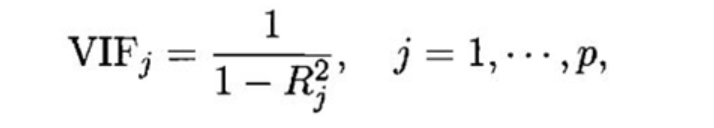

Here, VIFj  is the value of VIF for the jth variable, Rj2 is the R2 value of the model when that variable is regressed against all the other independent variables.

If the value of VIF is high for a variable, it implies that the R2  value of the corresponding model is high, i.e. other independent variables are able to explain that variable. In simple terms, the variable is linearly dependent on some other variables.

VIF 可以用于检验是否存在多重共线性，一般要求VIF小于10

**How to measure the accuracy of a linear regression model?**

We can use MSE and RMSE to measure

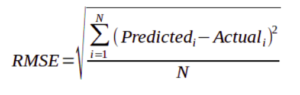

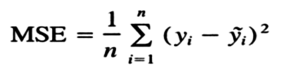



**What are the disadvantages of the linear model?**
Linear regression is sensitive to outliers which may affect the result.

– Over-fitting： 在训练集上的误差很小，但是在测试集中的误差很大，可以通过观察学习曲线

– Under-fitting

对异常值很敏感，可能出现过拟合或欠拟合的问题